In [ ]:
import uproot as up 

import sys

import matplotlib.pyplot as plt

import numpy as np 

import awkward as ak

from mpl_toolkits import mplot3d

import math as m

In [1]:
import numpy as np 
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Activation
from tensorflow.keras.layers import Conv3D,Conv2D, MaxPooling2D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Lambda, concatenate
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, RNN

from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Nadam
from tensorflow.keras import backend as K

from sklearn.metrics import *

import matplotlib
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

2023-03-19 11:25:07.203314: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import pandas as pd
class DataExtractor():
    def __init__(self,CSVNumber, Alt,n):
        #self.rootfile = rootfile
        self.CSVNumber = CSVNumber 
        self.Alt = Alt
        self.n = n 
    def Get(self):
        Cr = pd.read_csv('/Users/jacoblindahl/Cell{}.csv'.format(self.CSVNumber))
        
        Craw = Cr.fillna(0)
        
        Mraw = pd.read_csv('/Users/jacoblindahl/Module{}.csv'.format(self.CSVNumber))
        
        Lraw = pd.read_csv('/Users/jacoblindahl/Layer{}.csv'.format(self.CSVNumber))
        
        Eraw = pd.read_csv('/Users/jacoblindahl/Energy{}.csv'.format(self.CSVNumber)) 
        
        NR = len(Craw.axes[0])
        
        NC = len(Craw.axes[1])
        
        C = []
        
        M = []
        
        L = []
        
        E = []
        
        for i in range(NR):
            Ce = []
            
            Me = []
            
            Le = []
            
            Ee = []
            
            for j in range(NC):
                D = Craw['{}'.format(j)][i]
                #print(D)
                #print()
                if D != 0:
                    Ce.append(int(Craw['{}'.format(j)][i]))
                    Me.append(int(Mraw['{}'.format(j)][i]))
                    Le.append(int(Lraw['{}'.format(j)][i]))
                    Ee.append(int(Eraw['{}'.format(j)][i]))
        
            C.append(Ce)
            M.append(Me)
            L.append(Le)
            E.append(Ee)
        return C,M,L,E,NR
    
    def Constructor(self):
        CN,MN,LN,EN,NN = DataExtractor(self.CSVNumber,False,1).Get()
        if self.Alt == True:
            NN = self.n
        #B = np.zeros((34,7,500))    
        D = []
        for i in range(NN):
            B = np.zeros((34,7,500)) 
            for j in range(len(CN[i])):
            #RZ[i] = int(round(ResZ[i]))
            #if ResX[i] > 0:
            #    RX[i] = int(round(ResX[i]))
            #else:
            #    RX[i] = int(m.ceil(ResX[i]))    
            #if ResY[i] > 0:
            #    RY[i] = int(round(ResY[i]))
            #else:
            #    N =  m.ceil(ResY[i])
            #    RY[i] = int(N) 
                B[LN[i][j]][MN[i][j]][CN[i][j]] = EN[i][j]
            D.append(B)
        #return B
        DD = np.array(D)
        
        return DD

In [3]:
class DataMerger():
    def __init__(self,CSVNumbers, NumberClasses, Alternative, N):
        self.CSVNumbers = CSVNumbers
        self.NumberClasses = NumberClasses
        self.Alternative = Alternative 
        self.N = N
    def ClassMerger(self):
        MC = []
        YC = []
        j = 0
        for i in range(len(self.CSVNumbers)):
            DataM = DataExtractor(self.CSVNumbers[i],self.Alternative,self.N).Constructor()
            NL = len(DataM)
            MC.append(DataM)
            YC.append([j for k in range(NL)])
            j = j+1
        DX = np.concatenate(tuple(MC), axis=0)
        DY = np.concatenate(tuple(YC), axis=0)
        
        Xdata = DX.reshape(len(DX),34,7,500,1)
        Ydata = to_categorical(DY,num_classes = self.NumberClasses, dtype='int32')
        
        return Xdata,Ydata

In [4]:
Xtrain,Ytrain = DataMerger([1,2],2,False,1).ClassMerger()

print(Xtrain.shape)
print(Ytrain.shape)

(40000, 34, 7, 500, 1)
(40000, 2)


In [5]:
Xtest,Ytest = DataMerger(['1t','2t'],2,False,1).ClassMerger()

print(Xtest.shape)
print(Ytest.shape)

(10000, 34, 7, 500, 1)
(10000, 2)


In [6]:

from tensorflow.keras.layers import ConvLSTM2D


model = Sequential()


#model.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",recurrent_dropout=0.2, return_sequences=True, input_shape = (34,1, 71, 1)))

model.add(ConvLSTM2D(filters = 4, kernel_size = (1,1), activation = 'tanh',data_format = "channels_last",recurrent_dropout=0.2 ,return_sequences=True,input_shape = (34,7, 500, 1)))

#model.add(tf.keras.layers.MaxPooling3D(pool_size=(1,3, 3)))

#model.add(TimeDistributed(Dropout(0.2)))

#model.add(ConvLSTM2D(filters = 10, kernel_size = (4, 4), activation = 'tanh',data_format = "channels_last",recurrent_dropout=0.2 ,return_sequences=True,input_shape = (34,71, 71, 1)))



#model.add(tf.keras.layers.MaxPooling3D(pool_size=(1,3, 3)))



#model.add(TimeDistributed(Dropout(0.2)))

model.add(ConvLSTM2D(filters = 5, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",recurrent_dropout=0.2 ,return_sequences=True,input_shape = (34,7, 500, 1)))

#model.add(tf.keras.layers.MaxPooling3D(pool_size=(1,3, 3)))

#model.add(TimeDistributed(Dropout(0.2)))


model.add(Flatten())

#model.add(Dense(100,'tanh'))

model.add(Dense(2,'softmax'))


model.summary()



2023-03-19 11:34:45.078789: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 34, 7, 500, 4)     96        
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 34, 5, 498, 5)     1640      
                                                                 
 flatten (Flatten)           (None, 423300)            0         
                                                                 
 dense (Dense)               (None, 2)                 846602    
                                                                 
Total params: 848,338
Trainable params: 848,338
Non-trainable params: 0
_________________________________________________________________


In [7]:
#model.output_shape  
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam,loss='categorical_crossentropy',metrics = ['accuracy'])#optimizer="Adam",

#model.summary()
#for layer in model.layers:
#    print(layer.output_shape)

In [ ]:
Estimator = model.fit(Xtrain,Ytrain,epochs=3,batch_size=200
                      ,verbose=1,validation_data=(Xtest,Ytest))#,callbacks=[EarlyStopping(patience=15)])

Epoch 1/3
200/200 [==============================] - 7604s 38s/step - loss: 0.0578 - accuracy: 0.9822 - val_loss: 0.0080 - val_accuracy: 0.9977
Epoch 2/3
120/200 [=================>............] - ETA: 4:41:02 - loss: 0.0061 - accuracy: 0.9982

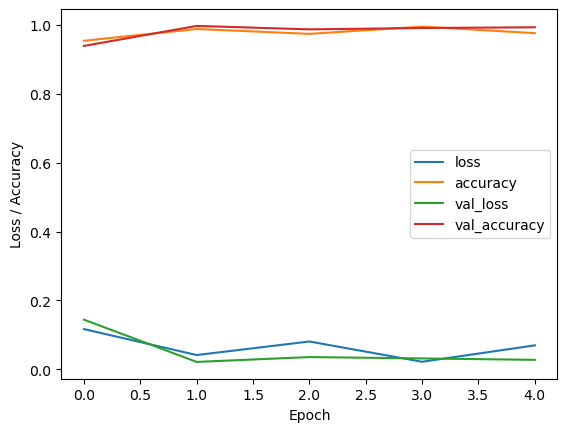

In [15]:
plt.figure()
plt.ylabel('Loss / Accuracy')
plt.xlabel('Epoch')
for k in Estimator.history.keys():
    plt.plot(Estimator.history[k], label = k) 
plt.legend(loc='best')
plt.show()

In [17]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    #plt.ylim([-0.5, cm.shape[0]-0.5])

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def multi_stat_3(model = None, x_test = None, y_test = None, lbl = None):
    y_pred = model.predict(x_test, verbose=0 )
    print(lbl,' log_loss:  ', log_loss(y_test, y_pred, eps=1e-15))

    y_true = y_test.argmax(axis=1)
    y_pred = y_pred.argmax(axis=1)
    print(lbl, ' accuracy:  ',(y_pred==y_true).mean(), '\n')

    target_names = ['class {}'.format(i+1) for i in range(3)]

    confuTst = confusion_matrix(y_true, y_pred)
    plot_confusion_matrix(cm           = confuTst, 
                          normalize    = False,
                          target_names = target_names,
                          title        = "Confusion Matrix: " + lbl)

Training  log_loss:   0.007483426757792479
Training  accuracy:   1.0 



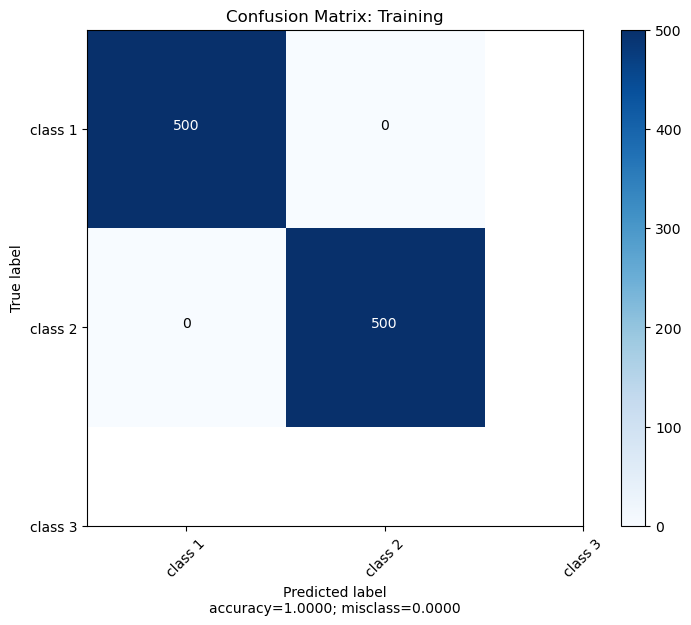

Validation  log_loss:   0.02790610279682339
Validation  accuracy:   0.992 



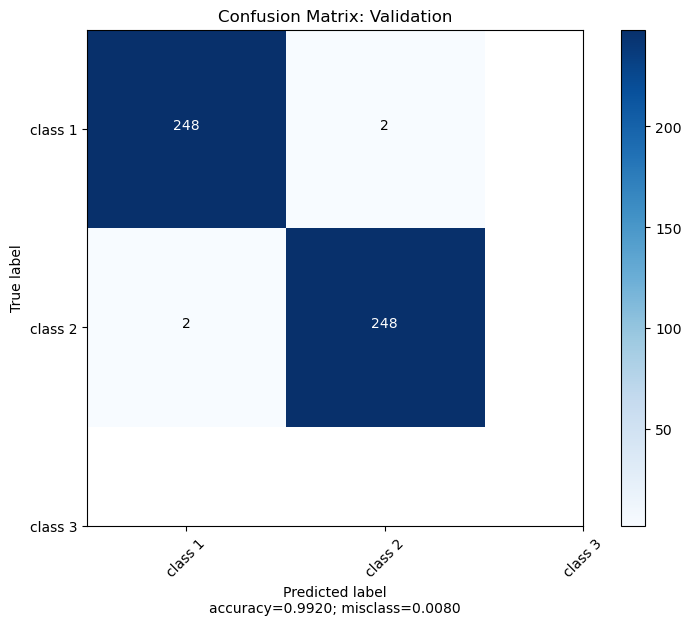

In [18]:
 multi_stat_3(model, Xtrain,Ytrain, 'Training')
    
 multi_stat_3(model, Xtest,Ytest, 'Validation')